# Assignment: Making Maps with Cartopy

### 1) Plot data from NARR

NARR is NCEP's [North American Regional Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html), a widely used product for studying the weather and climate of the continental US. The data is available from NOAA's [Earth System Research Laboratory](https://www.esrl.noaa.gov/) via [OPeNDAP](https://en.wikipedia.org/wiki/OPeNDAP), meaing that xarray can open the data "remotely" without downloading a file.

For this problem, you should open this geopential height file:

    https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc
    
And this precipitation file:

    https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc
    
Your goal is to make a map that looks like the one below. It shows total precipitation on Oct. 15, 2018 in blue, plus contours of the 500 mb geopotential surface.

_Hint: examine the dataset variables and attirbutes carefully in order to determine the projection of the data._

![narr_map](cartopy_figures/narr_map.png)

In [1]:
import xarray as xr
from numpy import array
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import cartopy.crs as ccrs
import cartopy

In [2]:
url = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc'
ds = xr.open_dataset(url,  drop_variables=['time_bnds'])
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


<xarray.Dataset>
Dimensions:            (level: 29, time: 31, x: 349, y: 277)
Coordinates:
  * time               (time) datetime64[ns] 2018-10-01 ... 2018-10-31
  * level              (level) float32 1000.0 975.0 950.0 ... 150.0 125.0 100.0
  * y                  (y) float32 0.0 32463.0 64926.0 ... 8927325.0 8959788.0
  * x                  (x) float32 0.0 32463.0 64926.0 ... 11264660.0 11297120.0
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Data variables:
    Lambert_Conformal  int32 ...
    hgt                (time, level, y, x) float32 ...
Attributes:
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    loncorners:                      [-145.5       -68.32005    -2.569891  14...
    platform:                        Model
    standardpar1:                    50.0
    standardpar2:                    50.000001
    title:                           Daily NARR
    history:                         created Sat Mar 26 07:07:59 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    References:                      
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
url2 = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc'
ds2 = xr.open_dataset(url2, drop_variables=['time_bnds'])
ds2

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'apcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


<xarray.Dataset>
Dimensions:            (time: 365, x: 349, y: 277)
Coordinates:
  * time               (time) datetime64[ns] 2018-01-01 ... 2018-12-31
  * y                  (y) float32 0.0 32463.0 64926.0 ... 8927325.0 8959788.0
  * x                  (x) float32 0.0 32463.0 64926.0 ... 11264660.0 11297120.0
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Data variables:
    Lambert_Conformal  int32 ...
    apcp               (time, y, x) float32 ...
Attributes:
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    loncorners:                      [-145.5       -68.32005    -2.569891  14...
    platform:                        Model
    standardpar1:                    50.0
    standardpar2:                    50.000001
    title:                           Daily NARR
    history:                         created Sat Mar 26 04:56:06 MDT 2016 by ...
    dataset_title:                   NCEP North American Regional Reanalysis ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    source:                          http://www.emc.ncep.noaa.gov/mmb/rreanl/...
    References:                      
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
prcp = ds2.apcp.sel(time='2018-10-15')

In [54]:
geo = ds.hgt.sel(level=500).sel(time='2018-10-15')

In [48]:
proj = cartopy.crs.LambertConformal(central_longitude=-107, 
                         central_latitude=50, 
                         false_easting=5632642.22547, 
                         false_northing=4612545.65137,
                         standard_parallels=[50,50])

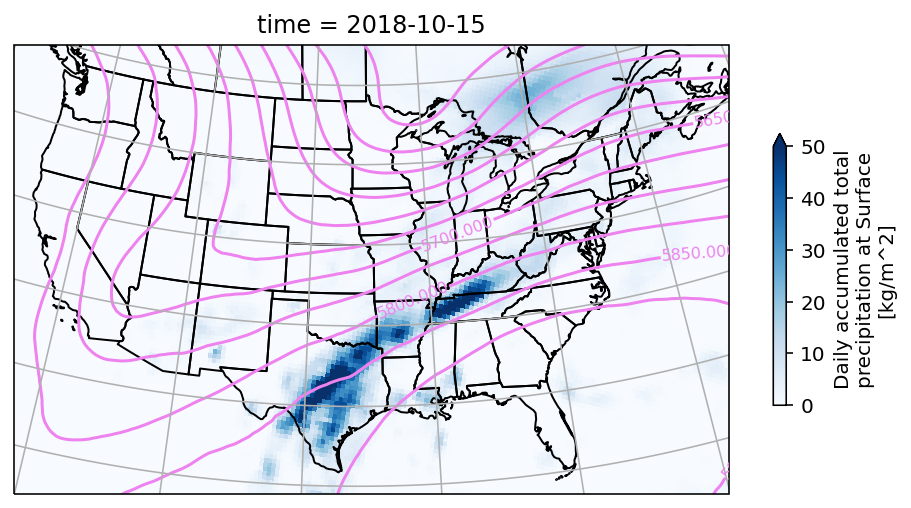

In [80]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 22, 50.5]
plt.figure(figsize=(8,5))
ax = plt.axes(projection = ccrs.AlbersEqualArea(central_lon, central_lat))
ax.gridlines()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.STATES)
contour = geo.plot.contour(transform=proj, levels=20, colors=['violet'])
ax.clabel(contour, inline=True, fontsize=8)
prcp.plot(vmin=0, vmax=50, cmap='Blues', transform=proj, cbar_kwargs={'shrink':0.5})

In [41]:
prcp

<xarray.DataArray 'apcp' (y: 277, x: 349)>
array([[0.007812, 0.015625, 0.09375 , ...,      nan,      nan,      nan],
       [0.117188, 0.28125 , 0.523438, ...,      nan,      nan,      nan],
       [0.367188, 0.898438, 0.820312, ...,      nan,      nan,      nan],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-10-15
  * y        (y) float32 0.0 32463.0 64926.0 ... 8894862.0 8927325.0 8959788.0
  * x        (x) float32 0.0 32463.0 64926.0 ... 11264660.0 11297120.0
    lat      (y, x) float32 1.000001 1.104305 1.208292 ... 46.64134 46.3544
    lon      (y, x) float32 -145.5 -145.315 -145.1295 ... -2.643617 -2.569891
Attributes:
    GRIB_id:        61
    GRIB_name:      APCP
    grid_mapping:   Lambert_Conformal
    level_desc:     Surface
    standard_name:  precipitation_amount
    units:          kg/m^2
    var_desc:       Precipitation amount
    dataset:        NARR Daily Sums
    long_name:      Daily accumulated total precipitation at Surface
    parent_stat:    Individual Obs
    statistic:      Sum
    valid_range:    [  0. 800.]
    actual_range:   [  0.   332.75]
    _ChunkSizes:    [  1 277 349]

### 2) Antarctic Sea Ice

Download this file and then use it to plot the concentration of Antarctic Sea Ice on Aug. 7, 2017. Again, you will need to explore the file contents in order to determine the correct projection.

    ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc
    
You'll have to download this one with `wget`.

In [7]:
! wget ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc

--2020-11-16 16:18:25--  ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc
           => ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.1’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/NOAA/G02202_V3/south/daily/2017 ... done.
==> SIZE seaice_conc_daily_sh_f17_20170807_v03r01.nc ... 2682793
==> PASV ... done.    ==> RETR seaice_conc_daily_sh_f17_20170807_v03r01.nc ... done.
Length: 2682793 (2.6M) (unauthoritative)

seaice_conc_daily_s 100%[===================>]   2.56M  5.76MB/s    in 0.4s    

2020-11-16 16:18:26 (5.76 MB/s) - ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.1’ saved [2682793]



In [8]:
url3 = 'seaice_conc_daily_sh_f17_20170807_v03r01.nc'

In [9]:
seaice = xr.open_dataset(url3)
seaice

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'melt_onset_day_seaice_conc_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


<xarray.Dataset>
Dimensions:                         (time: 1, xgrid: 316, ygrid: 332)
Coordinates:
  * time                            (time) datetime64[ns] 2017-08-07
  * ygrid                           (ygrid) float32 4337500.0 ... -3937500.0
  * xgrid                           (xgrid) float32 -3937500.0 ... 3937500.0
    latitude                        (ygrid, xgrid) float64 ...
    longitude                       (ygrid, xgrid) float64 ...
Data variables:
    projection                      |S1 ...
    seaice_conc_cdr                 (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_cdr        (time, ygrid, xgrid) float32 ...
    melt_onset_day_seaice_conc_cdr  (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_cdr           (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc      (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc          (time, ygrid, xgrid) float32 ...
    goddard_bt_seaice_conc          (time, ygrid, xgrid) float32 ...
Attributes:
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    program:                   NOAA Climate Data Record Program
    cdr_variable:              seaice_conc_cdr
    software_version_id:       git@bitbucket.org:nsidc/seaice_cdr.git@37f2e43...
    Metadata_Link:             https://nsidc.org/api/dataset/metadata/v2/oai?...
    product_version:           v03r01
    spatial_resolution:        25km
    standard_name_vocabulary:  CF Standard Name Table (v16, 11 October 2010)
    id:                        G02202
    naming_authority:          nsidc.org
    license:                   No constraints on data access or use
    summary:                   This data set provides a passive microwave sea...
    keywords:                  EARTH SCIENCE > CRYOSPHERE > SEA ICE > SEA ICE...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Key...
    cdm_data_type:             Grid
    project:                   NOAA/NSIDC passive microwave sea ice concentra...
    creator_url:               http://nsidc.org/
    creator_email:             nsidc@nsidc.org
    institution:               NSIDC > National Snow and Ice Data Center
    processing_level:          NOAA Level 3
    geospatial_lat_min:        -90.0
    geospatial_lat_max:        -41.45
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    geospatial_lon_units:      degrees_east
    time_coverage_duration:    P1D
    time_coverage_resolution:  P1D
    contributor_name:          Walt Meier, Ruth Duerr, Florence Fetterer, Jul...
    contributor_role:          PrincipalInvestigator,author,author,author,aut...
    acknowledgment:            This project was supported in part by a grant ...
    source:                    ftp://sidads.colorado.edu/DATASETS/nsidc0001_p...
    history:                   seaice_conc_daily_sh_f17_20170807_v03r01.nc cr...
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2018-10-01T18:45:17Z
    time_coverage_start:       2017-08-07T00:00:00Z
    time_coverage_end:         2017-08-07T23:59:59Z
    comment:                   The variable melt_onset_day_seaice_conc_cdr is...

In [10]:
cdr = seaice.sel(time='2017-08-07')
cdr = cdr.seaice_conc_cdr

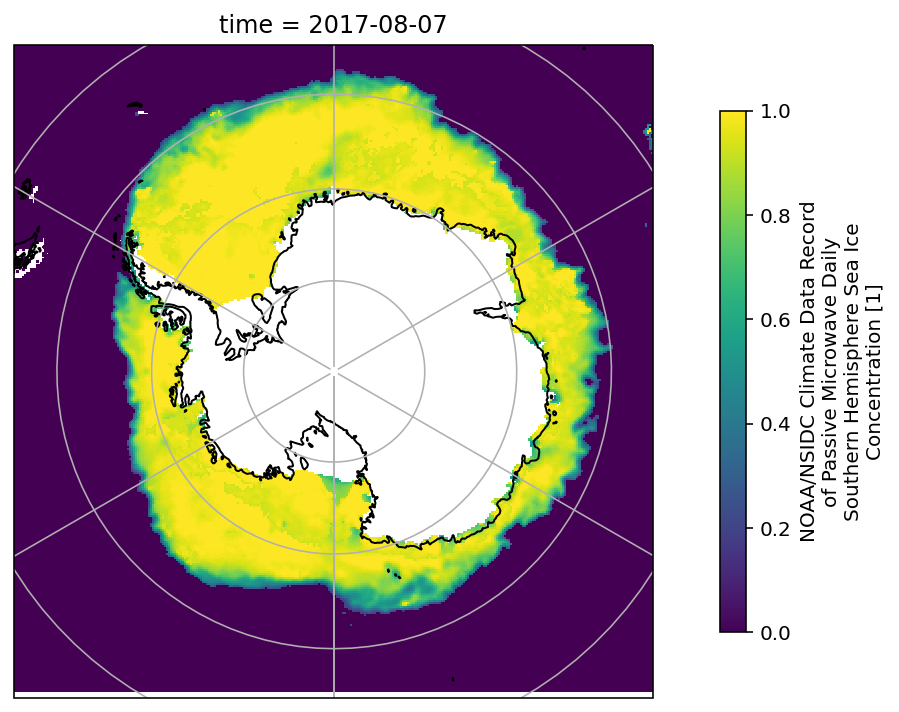

In [75]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection = ccrs.SouthPolarStereo())
ax.gridlines()
ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
cdr.where(cdr <= 1).plot(cbar_kwargs={'shrink':0.8})
ax.coastlines();

![sea_ice_map](cartopy_figures/sea_ice_map.png)

### 3) Global USGS Earthquakes

Reload the file we explored in homework 5 using pandas

    http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
    
and use the data to recreate this map.

In [12]:
import pandas as pd
! wget http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

--2020-11-16 16:18:28--  http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv [following]
--2020-11-16 16:18:28--  https://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19441088 (19M) [text/csv]
Saving to: ‘usgs_earthquakes_2014.csv.4’

usgs_earthquakes_20 100%[===================>]  18.54M  47.6MB/s    in 0.4s    

2020-11-16 16:18:28 (47.6 MB/s) - ‘usgs_earthquakes_2014.csv.4’ saved [19441088/19441088]



In [13]:
data = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(data)

In [14]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [15]:
df = df.nlargest(50, 'mag')
import matplotlib.cm as cm

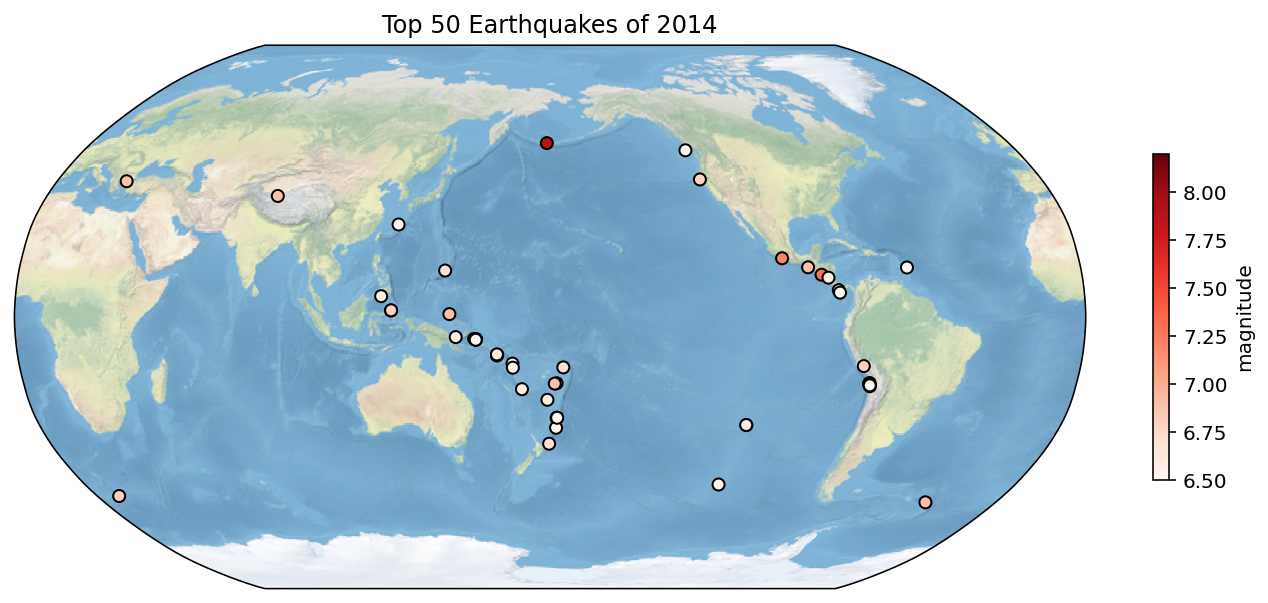

In [21]:
plt.figure(figsize=(12,6))
ax = plt.axes(projection = ccrs.Robinson(central_longitude = 180))
ax.stock_img()
ax.set_title('Top 50 Earthquakes of 2014');
x = df['longitude']
y = df['latitude']
z = df['mag']
plt.scatter(x, y, c=z, cmap='Reds', edgecolor = 'black', transform=ccrs.PlateCarree())
plt.colorbar(label = 'magnitude', shrink=0.5)

![earthquake_map](cartopy_figures/earthquake_map.png)